In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [59]:

# Load data into DataFrame
df = pd.read_csv('Sample.csv')  # Replace with the actual path to your file

# Filter for Rural sector and year 2011
rural_data = df[(df['Sector'] == 'Rural') & (df['Year'] == 2011)]
rural_data = rural_data.reset_index(drop=True)
rural_data = rural_data.dropna(axis=1, how='all')
print(rural_data)

   Sector  Year      Month  Andhra Pradesh  Assam  Chattisgarh    Goa
0   Rural  2011    January           104.0  104.0        105.0  103.0
1   Rural  2011   February           107.0  105.0        107.0  105.0
2   Rural  2011      March           103.1  103.8        103.9  103.9
3   Rural  2011      April           105.0  106.0        105.0  104.0
4   Rural  2011        May           106.1  107.9        106.2  107.0
5   Rural  2011       June           107.4  109.5        106.9  107.1
6   Rural  2011       July           110.8  112.3        110.9  111.2
7   Rural  2011     August           109.0  110.0        109.9  108.1
8   Rural  2011  September           110.0  111.1        111.2  110.0
9   Rural  2011    October           111.3  112.3        112.5  110.9
10  Rural  2011   November           113.0  115.5        113.4  112.0
11  Rural  2011   December           113.3  113.0        112.7  112.6


In [65]:
# Assuming 'data.csv' is the file containing the dataset


# Select only columns with state data (ignoring non-numeric and NA values)
state_columns =  [col for col in rural_data.columns if col not in ['Sector', 'Year', 'Month']]




In [66]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling (exclude 'Sector', 'Year', 'Month' columns)
numeric_cols = rural_data.select_dtypes(include=['float64', 'int64']).columns

# Create the StandardScaler object
scaler = StandardScaler()

# Apply the scaler only to the numeric columns
scaled_data = scaler.fit_transform(rural_data[numeric_cols])

# Convert the scaled data back into a DataFrame for easy inspection (optional)
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# If you want to add this scaled data back to the original DataFrame:
rural_data[numeric_cols] = scaled_data_df

In [67]:
scaled_data_df

,Year,Andhra Pradesh,Assam,Chattisgarh,Goa
0,0.0,-1.319270,-1.408926,-1.138630,-1.498441
1,0.0,-0.405929,-1.137979,-0.525914,-0.886832
2,0.0,-1.593272,-1.463116,-1.475623,-1.223217
3,0.0,-1.014823,-0.867031,-1.138630,-1.192636
4,0.0,-0.679932,-0.352232,-0.771000,-0.275224
5,0.0,-0.284150,0.081284,-0.556550,-0.244643
6,0.0,0.750969,0.839937,0.668881,1.009154
7,0.0,0.202965,0.216758,0.362523,0.061161
8,0.0,0.507412,0.514800,0.760789,0.642189
9,0.0,0.903193,0.839937,1.159054,0.917413


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

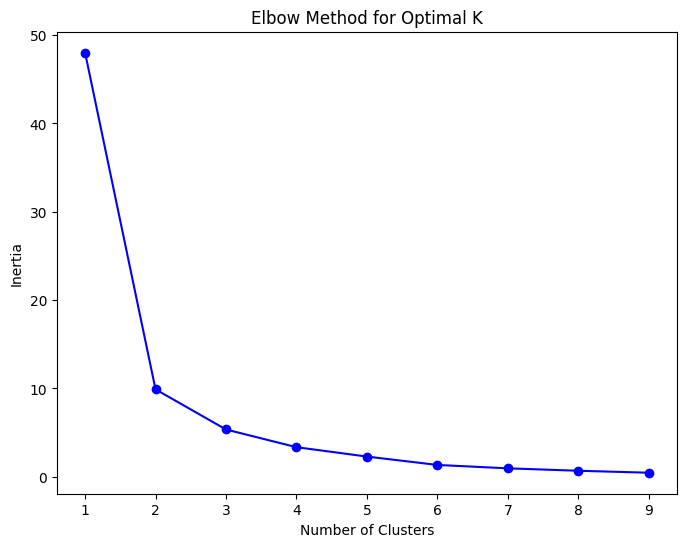

In [68]:
# Elbow Method
inertia = []
K = range(1, 10)  # Test up to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [69]:
# Optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
rural_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Display clusters
print(rural_data[['Cluster'] + state_columns])

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    Cluster  Andhra Pradesh     Assam  Chattisgarh       Goa  Cluster
0         1       -1.319270 -1.408926    -1.138630 -1.498441        1
1         1       -0.405929 -1.137979    -0.525914 -0.886832        1
2         1       -1.593272 -1.463116    -1.475623 -1.223217        1
3         1       -1.014823 -0.867031    -1.138630 -1.192636        1
4         2       -0.679932 -0.352232    -0.771000 -0.275224        2
5         2       -0.284150  0.081284    -0.556550 -0.244643        2
6         0        0.750969  0.839937     0.668881  1.009154        0
7         2        0.202965  0.216758     0.362523  0.061161        2
8         0        0.507412  0.514800     0.760789  0.642189        0
9         0        0.903193  0.839937     1.159054  0.917413        0
10        0        1.420752  1.706968     1.434776  1.253797        0
11        0        1.512087  1.029600     1.220325  1.437280        0


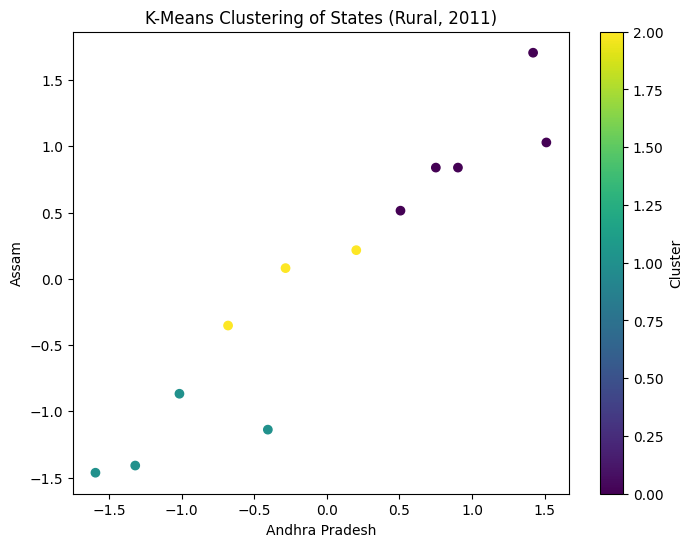

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(rural_data['Andhra Pradesh'], rural_data['Assam'], c=rural_data['Cluster'], cmap='viridis')
plt.xlabel('Andhra Pradesh')
plt.ylabel('Assam')
plt.title('K-Means Clustering of States (Rural, 2011)')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data into DataFrame
df = pd.read_csv('Statewise_General_Index_Upto_Nov23.csv')  # Replace with the actual path to your file

# Filter for Rural sector and year 2011, then drop unnecessary columns
rural_data = df[(df['Sector'] == 'Rural') & (df['Year'] == 2011)]
rural_data = rural_data.drop(['Sector', 'Year', 'Month'], axis=1).dropna(axis=1, how='all')

# Transpose data so each row represents a state
rural_data = rural_data.transpose()
rural_data.columns = [f'Month {i+1}' for i in range(rural_data.shape[1])]  # Rename columns as months
rural_data.index.name = 'State'
rural_data.reset_index(inplace=True)

# Standardize the CPI data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rural_data.iloc[:, 1:])  # Exclude 'State' column for scaling

# Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 10)  # Test up to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method using Plotly
fig_elbow = go.Figure()
fig_elbow.add_trace(go.Scatter(x=list(K), y=inertia, mode='lines+markers', marker=dict(color='blue')))
fig_elbow.update_layout(
    title="Elbow Method for Optimal K",
    xaxis_title="Number of Clusters",
    yaxis_title="Inertia"
)
fig_elbow.show()

# Set the optimal number of clusters based on the Elbow Method
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
rural_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Label clusters as High, Middle, and Low Income based on CPI scores
income_labels = {0: "High Income", 1: "Middle Income", 2: "Low Income"}
rural_data['Income Level'] = rural_data['Cluster'].map(income_labels)

# Apply PCA to reduce dimensions for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)   

# Get centroids in the PCA-reduced space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot clusters with Plotly and color-match centroids to their clusters
fig_clusters = go.Figure()

# Plot each cluster and assign colors
cluster_colors = px.colors.qualitative.Plotly  # Using Plotly's qualitative color palette

for cluster in range(optimal_k):
    # Filter data for each cluster
    cluster_data = pca_data[rural_data['Cluster'] == cluster]
    cluster_state_names = rural_data['State'][rural_data['Cluster'] == cluster]  # State names for hover info
    centroid = centroids_pca[cluster]

    # Plot cluster points with state names on hover
    fig_clusters.add_trace(go.Scatter(
        x=cluster_data[:, 0], y=cluster_data[:, 1],
        mode='markers',
        marker=dict(size=8, color=cluster_colors[cluster]),
        name=f'{income_labels[cluster]}',
        text=cluster_state_names,  # State names for hover info
        hovertemplate='State: %{text}<br>PC1: %{x:.2f}<br>PC2: %{y:.2f}<extra></extra>'
    ))

    # Plot centroids with matching colors
    fig_clusters.add_trace(go.Scatter(
        x=[centroid[0]], y=[centroid[1]],
        mode='markers',
        marker=dict(size=15, color=cluster_colors[cluster], symbol='x'),
        name=f'{income_labels[cluster]} Centroid',
        hoverinfo='skip'  # Skips hover info for centroids
    ))

# Update layout for better visualization
fig_clusters.update_layout(
    title="KMeans Clustering of States by CPI (Rural, 2011)",
    xaxis_title="Principal Component 1 (PCA)",
    yaxis_title="Principal Component 2 (PCA)",
    showlegend=True
)

fig_clusters.show()


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Acer\

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KeyError: 3